### Импортируем библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Загрузка датасета.

In [2]:
df = pd.read_csv("./data/cars_sampled.csv", parse_dates=["dateCreated", "lastSeen", "dateCrawled"])
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


### Описательная статистика: размер, типы переменных, пустые значения, уникальные имена.

##### Размер

In [3]:
df.shape

(50001, 19)

##### Типы переменных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          50001 non-null  datetime64[ns]
 1   name                 50001 non-null  object        
 2   seller               50001 non-null  object        
 3   offerType            50001 non-null  object        
 4   price                50001 non-null  int64         
 5   abtest               50001 non-null  object        
 6   vehicleType          44813 non-null  object        
 7   yearOfRegistration   50001 non-null  int64         
 8   gearbox              47177 non-null  object        
 9   powerPS              50001 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            50001 non-null  int64         
 12  monthOfRegistration  50001 non-null  int64         
 13  fuelType             45498 non-

##### Пустые значения

In [5]:
df.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

##### Уникальные значения

In [6]:
df.nunique()

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

### Все числовые значения имеют формат int.

### Обработка столбца price. Построение гистограммы, поиск выбросов через ящиковую диаграмму, удаление аномальных значений, приведение к нормальному распределению.


##### Построение гистограммы

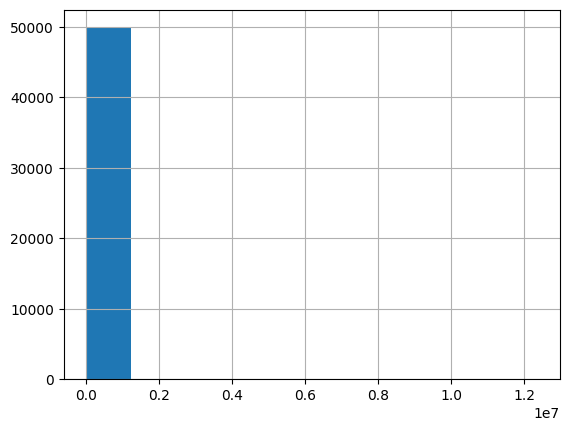

In [7]:
df["price"].hist()
plt.show()

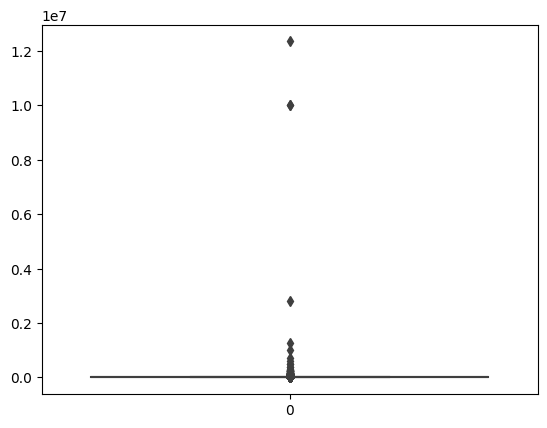

In [8]:
sns.boxplot(data=df['price'])
plt.show()

На ящиковой диаграмме видно очень большое колличество выбросов

##### Удаление выбросов

In [9]:
def func_q(col):
    q3 = np.percentile(col, 75)
    q1 = np.percentile(col, 25)

    iqr = q3-q1

    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return upper, lower

Для удаления выбросов мы использовали межквартильный метод выявления аномальных значений. Для этого мы рассчитали IQR, как разницу между 75-м и 25-м процентилями данных. Пороговым значением для выбросов мы считаем все, что  как 1,5-кратное IQR и вычесть это пороговое значение из 25-го процентиля и добавить его к 75-му процентилю, чтобы получить фактические пределы данных.

In [10]:
upper, lower = func_q(df.price)

df.loc[(df.price > upper), 'price'] = np.percentile(df.price, 50)
df.loc[(df.price < lower), 'price'] = np.percentile(df.price, 50)

Значения выбросов заменяем медианным значением

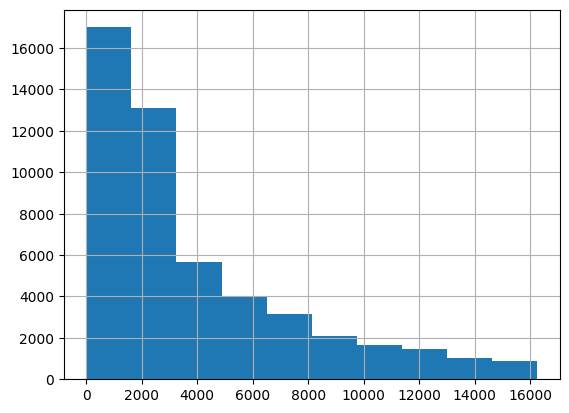

In [11]:
df["price"].hist()
plt.show()

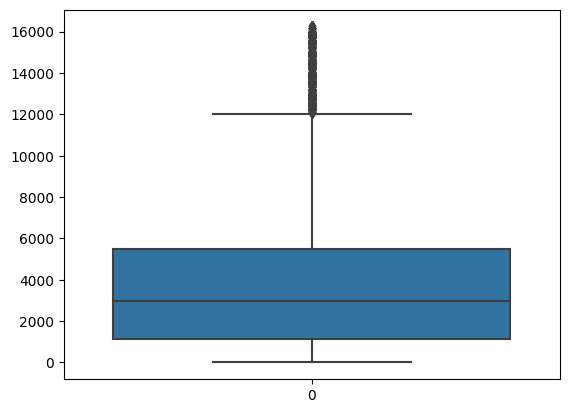

In [12]:
sns.boxplot(data=df['price'])
plt.show()

##### Приведение к нормальному распределению

In [13]:
df['price'] = np.log(df['price']+1)

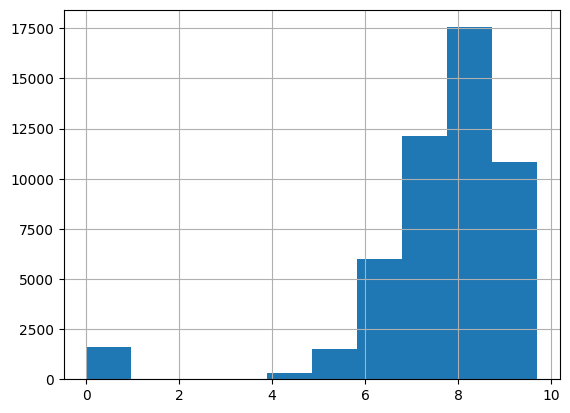

In [14]:
df["price"].hist()
plt.show()

При логарифмировании наши данные пришли к нормальному распределению. Таким образом на графике самым большим колличеством представленно значение около 8, по моим подсчетам это соответствует изначальным данным в примерном диапазоне от 2000 до 8000

### Обработка параметров важных для целевой переменной  (powerPS, yearOfRegistration, kilometer и т.д). Доказательство важности через коэффициент корреляции с помощью визуализации

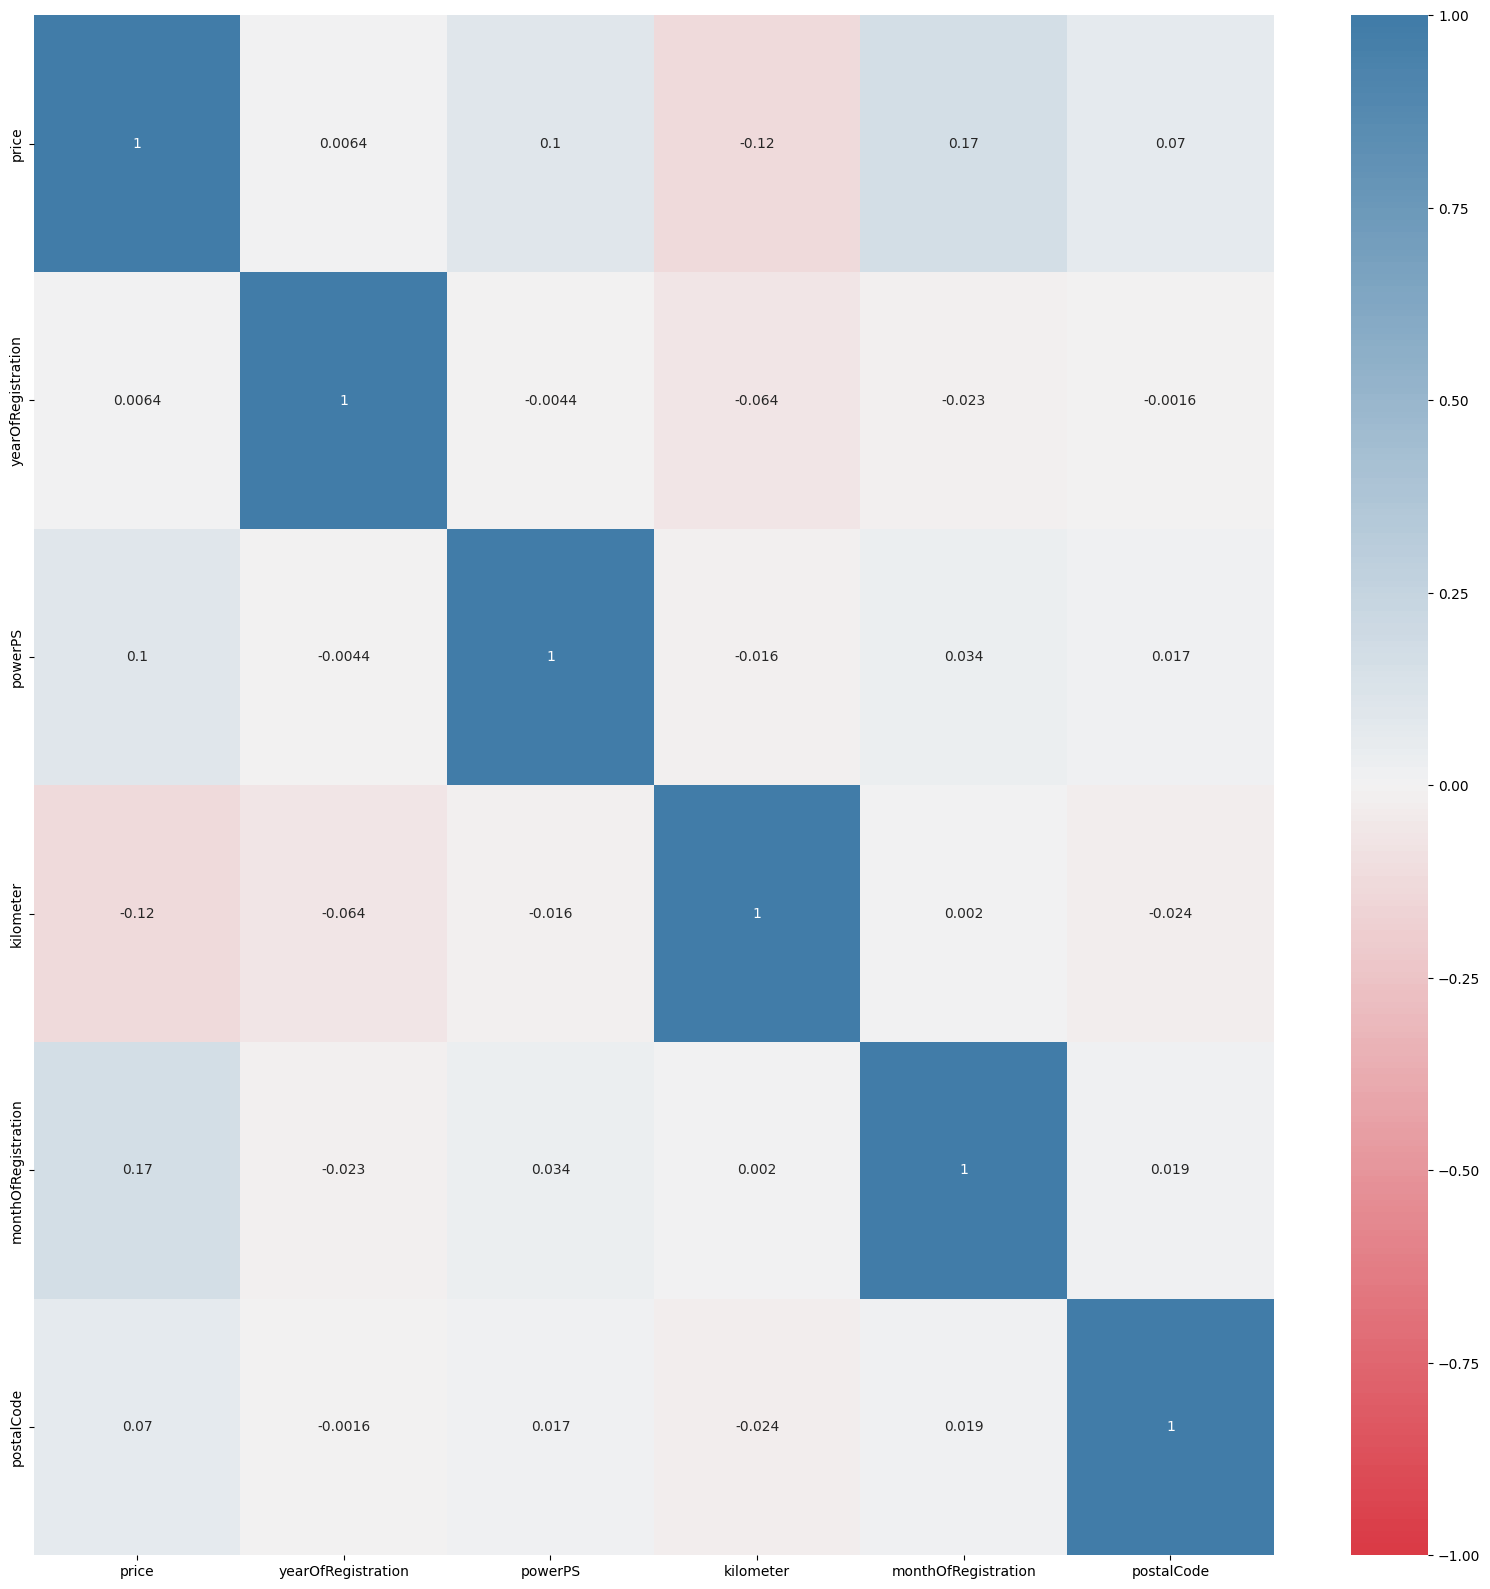

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    df.corr().round(5),
    annot=True,
    annot_kws={'size': 10},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200))
plt.show()

##### Обработка признака yearOfRegistration

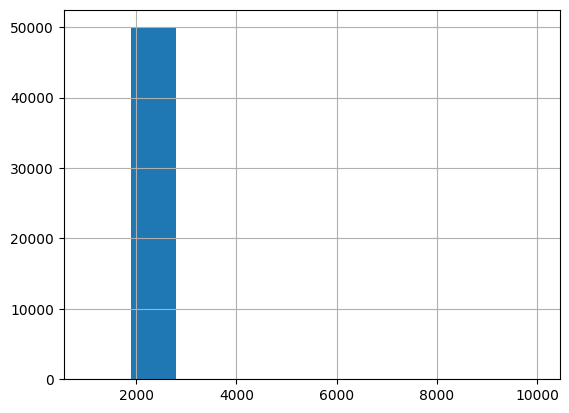

In [16]:
df['yearOfRegistration'].hist()
plt.show()

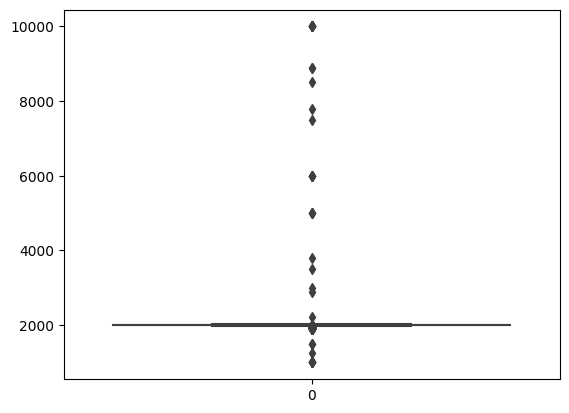

In [17]:
sns.boxplot(data=df['yearOfRegistration'])
plt.show()

На ящиковой диаграмме видно очень большое колличество выбросов

In [18]:
upper, lower = func_q(df.yearOfRegistration)

df.loc[(df.yearOfRegistration > upper), 'yearOfRegistration'] = np.percentile(df.yearOfRegistration, 50)
df.loc[(df.yearOfRegistration < lower), 'yearOfRegistration'] = np.percentile(df.yearOfRegistration, 50)

Удалили выбросы

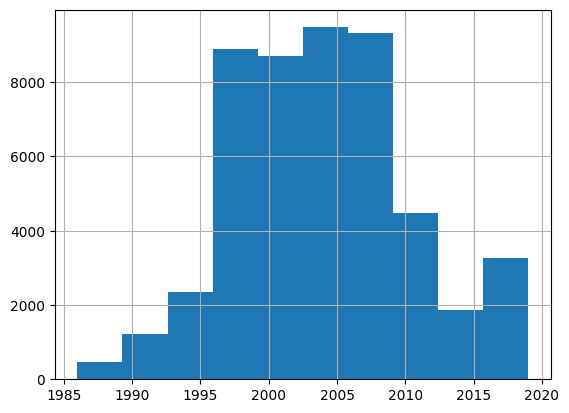

In [19]:
df['yearOfRegistration'].hist()
plt.show()

Распределение близкое к нормальному

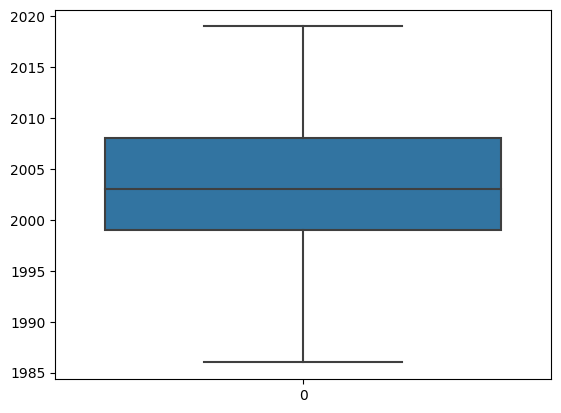

In [20]:
sns.boxplot(data=df['yearOfRegistration'])
plt.show()

##### Обработка признака powerPS

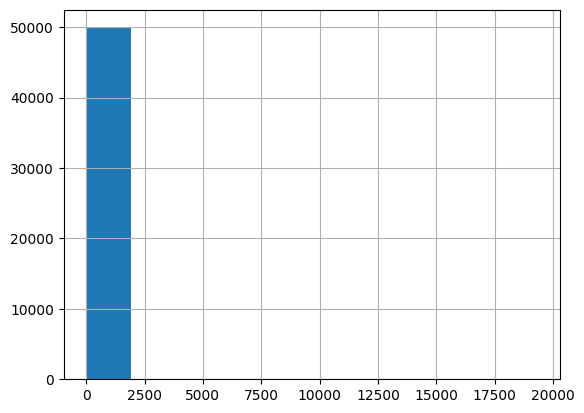

In [21]:
df['powerPS'].hist()
plt.show()

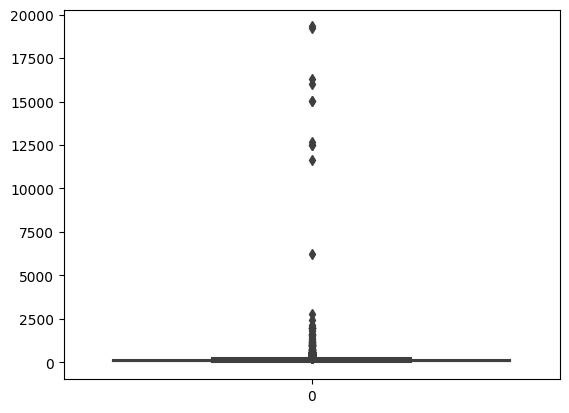

In [22]:
sns.boxplot(data=df['powerPS'])
plt.show()

На ящиковой диаграмме видно очень большое колличество выбросов

In [23]:
upper, lower = func_q(df.powerPS)

df.loc[(df.powerPS > upper), 'powerPS'] = np.percentile(df.powerPS, 50)
df.loc[(df.powerPS < lower), 'powerPS'] = np.percentile(df.powerPS, 50)

Удалили выбросы

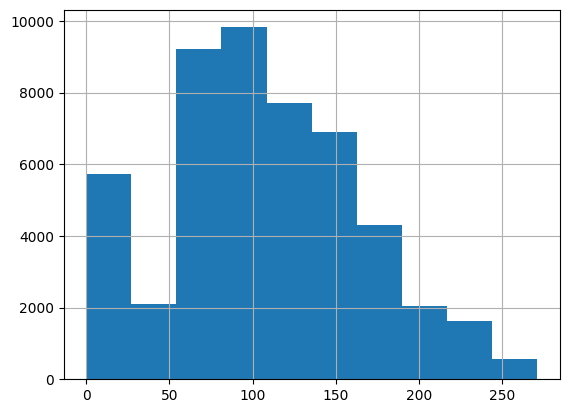

In [24]:
df['powerPS'].hist()
plt.show()

Распределение близкое к нормальному

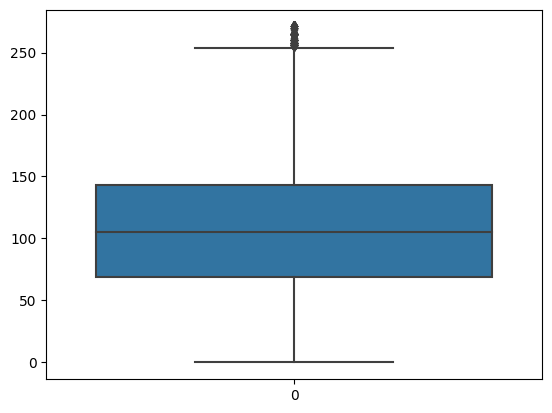

In [25]:
sns.boxplot(data=df['powerPS'])
plt.show()

##### Обработка признака kilometer

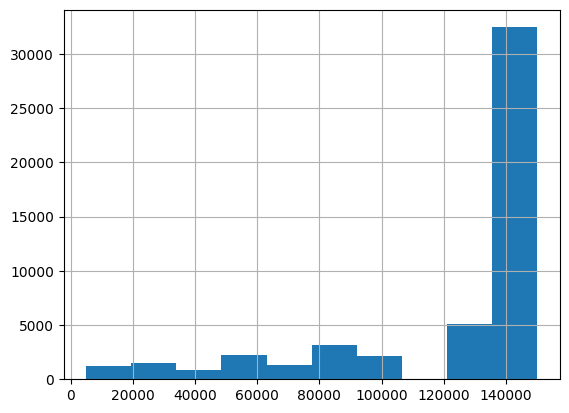

In [26]:
df['kilometer'].hist()
plt.show()

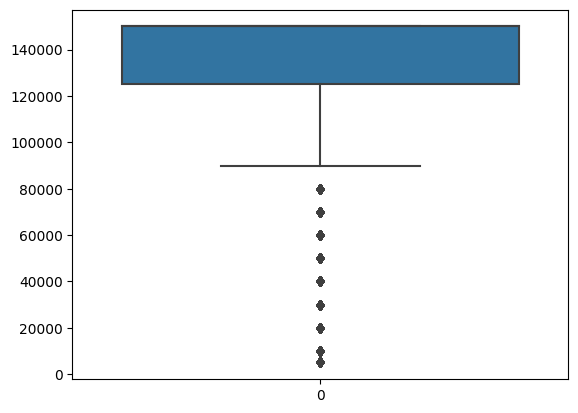

In [27]:
sns.boxplot(data=df['kilometer'])
plt.show()

На ящиковой диаграмме видно очень большое колличество выбросов

In [28]:
upper, lower = func_q(df.kilometer)

df.loc[(df.kilometer > upper), 'kilometer'] = np.percentile(df.kilometer, 50)
df.loc[(df.kilometer < lower), 'kilometer'] = np.percentile(df.kilometer, 50)

Удалили выбросы

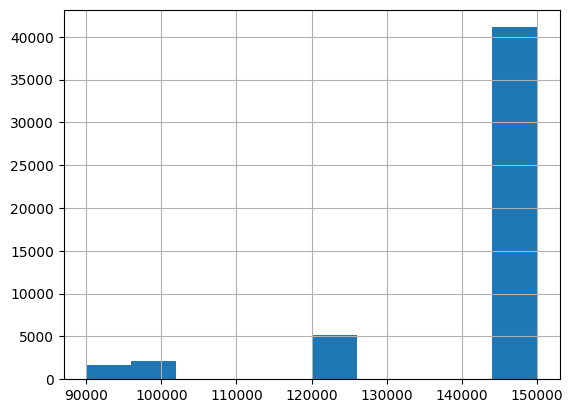

In [29]:
df['kilometer'].hist()
plt.show()

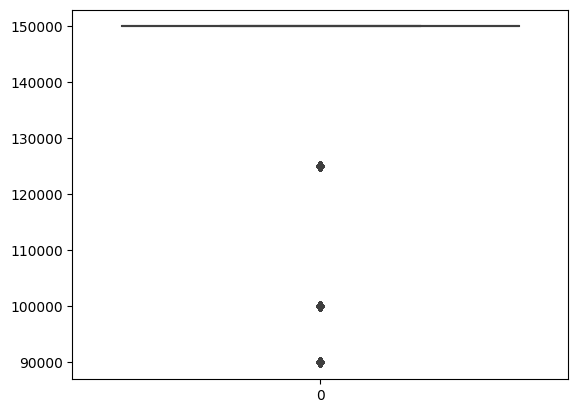

In [30]:
sns.boxplot(data=df['kilometer'])
plt.show()

Помимо тех выбросов, что мы удалили и выбросов изображенных на ящиковой диаграмме, у нас множество значений, которые все равны 150000.

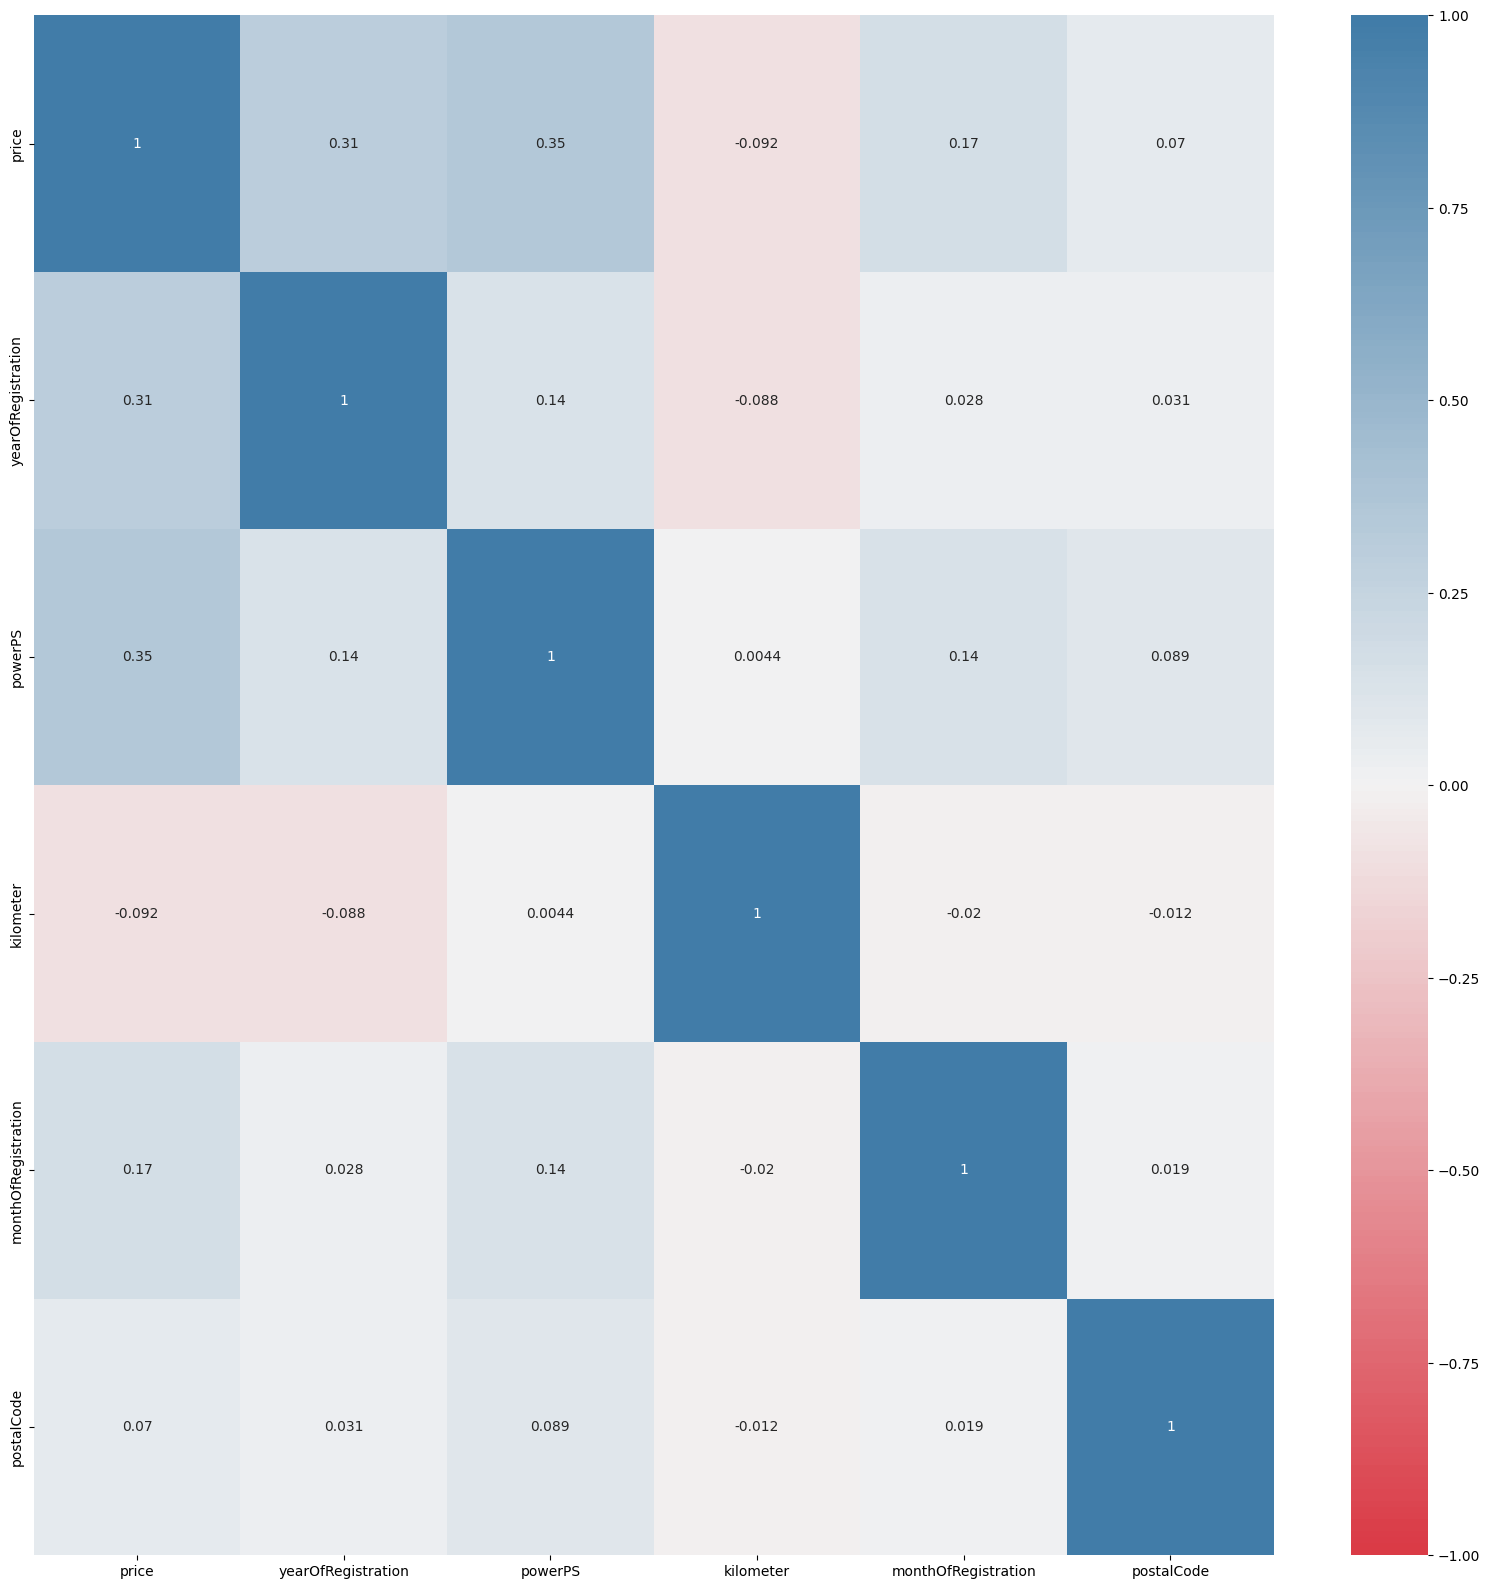

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    df.corr().round(5),
    annot=True,
    annot_kws={'size': 10},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200))
plt.show()

Зависимость целевой переменной от признаков увеличилась

### Построение ящиковых диаграмм зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price.

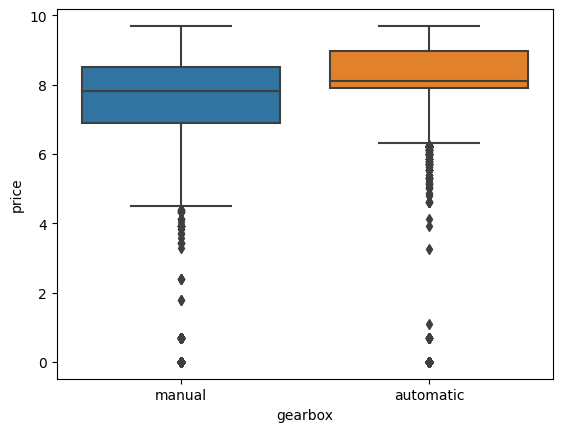

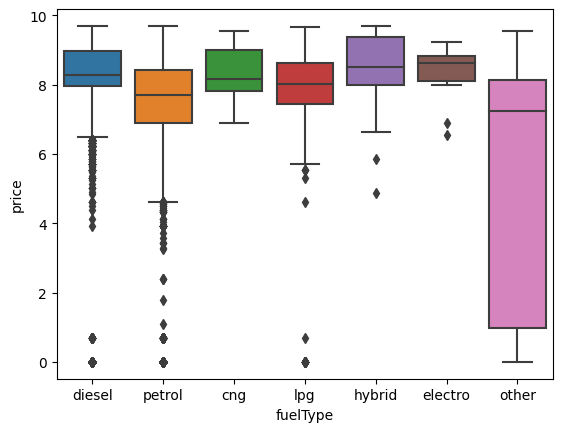

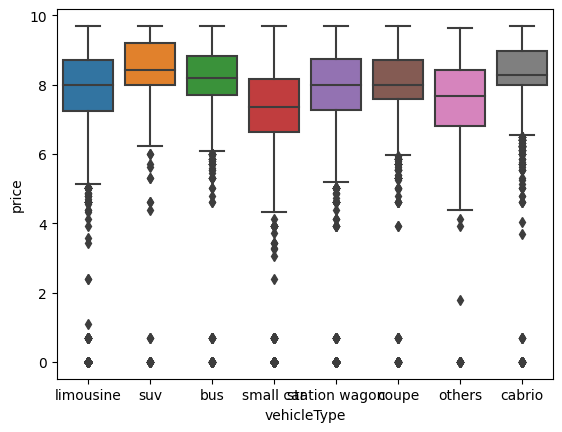

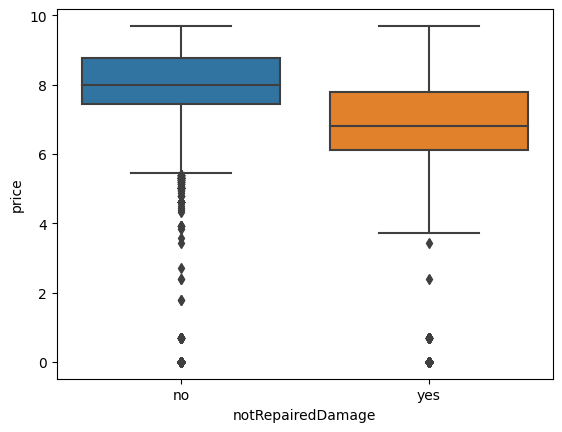

In [32]:
for col in ["gearbox", "fuelType", "vehicleType", "notRepairedDamage"]:
    ax = sns.boxplot(x=df[col], y=df["price"], data=df)
    plt.show()

### Нахождение пропусков. Удаление столбцов, которые содержат большое количество пропусков.

In [33]:
nan_series = df.isna().sum()
nan_series[nan_series > 0]

vehicleType          5188
gearbox              2824
model                2758
fuelType             4503
notRepairedDamage    9716
dtype: int64

In [34]:
df = df.drop(["notRepairedDamage"], axis = 1)

In [35]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,150000,12,petrol,seat,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,7.989899,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,2016-03-16,55270,2016-01-04 23:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,2016-03-04,29690,2016-05-04 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,7.989899,control,NaN,1990,NaN,0,golf,150000,0,NaN,volkswagen,2016-03-27,50181,2016-07-04 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,2016-03-15,65232,2016-06-04 17:15:00


Удалили столбец notRepairedDamage, так как в нем большое количество выбросов

В остальных случаях попробуем восстановить пропущенные значения

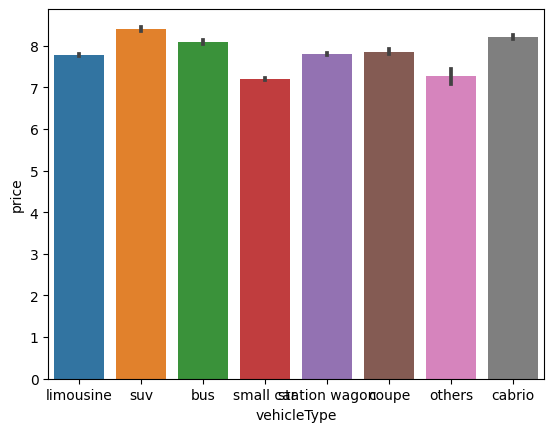

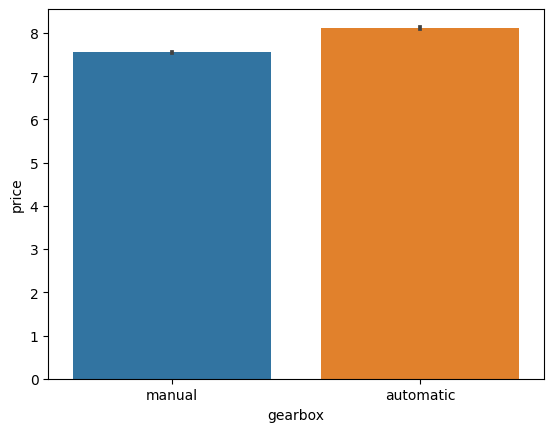

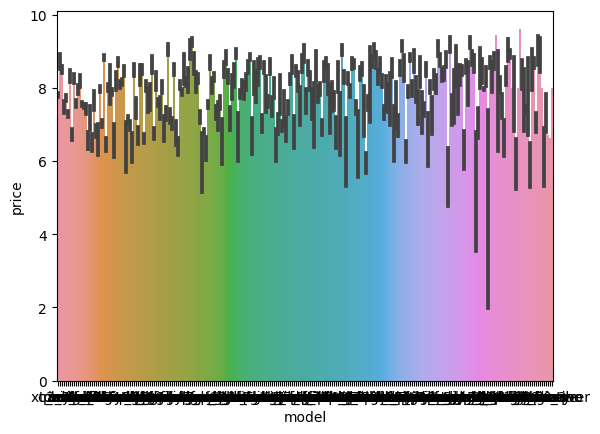

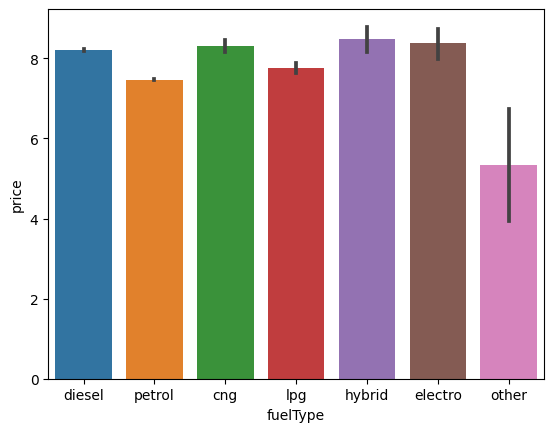

In [36]:
for col in ["vehicleType", "gearbox", "model", "fuelType"]:
    ax = sns.barplot(x=df[col], y=df["price"], data=df)
    plt.show()

Все пропущенные значения, кроме model, являются категориальными, поэтому их следует заменять модой.

In [37]:
import statistics as st

In [38]:
for col in [ "vehicleType", "gearbox", "fuelType"]:
    df[col] = df[col].fillna(st.mode(df[col]))

In [39]:
nan_series = df.isna().sum()
nan_series[nan_series > 0]

model    2758
dtype: int64

Пустые значения model просто удалим

In [40]:
df = df.dropna()

In [41]:
df.shape

(47243, 18)

### Сохранение полученного датасета

In [42]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,ibiza,150000,12,petrol,seat,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,7.989899,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,2016-03-16,55270,2016-01-04 23:18:00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47243 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          47243 non-null  datetime64[ns]
 1   name                 47243 non-null  object        
 2   seller               47243 non-null  object        
 3   offerType            47243 non-null  object        
 4   price                47243 non-null  float64       
 5   abtest               47243 non-null  object        
 6   vehicleType          47243 non-null  object        
 7   yearOfRegistration   47243 non-null  int64         
 8   gearbox              47243 non-null  object        
 9   powerPS              47243 non-null  int64         
 10  model                47243 non-null  object        
 11  kilometer            47243 non-null  int64         
 12  monthOfRegistration  47243 non-null  int64         
 13  fuelType             47243 non-

In [44]:
df.to_csv("cars_sampled_new.csv")